In [1]:
import config_tf
from dataset import CardsWarper
from models import CardsEmbeding_v4
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

2 Physical GPUs, 2 Logical GPUs


2021-10-25 08:44:01.499748: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-25 08:44:01.501109: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-25 08:44:01.507708: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-25 08:44:01.509060: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-25 08:44:01.509791: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [2]:
hand_size = 5
max_repeat = 5

embeding_size = 64
num_blocks = 2
num_heads = 2

In [3]:
wp = CardsWarper( 'cards.json' )

In [4]:
dec1 = np.array( [[ 1, 2, 3, 4, 5 ]] )
dec2 = np.array( [[ 4, 6, 5, 8, 7 ]] )
dec3 = np.array( [[ 1, 7, 8, 9, 10 ]] )
dec4 = np.array( [[ 10, 11, 14, 14 ]] )
dec5 = np.array( [[ 25, 28, 31 ]] )

In [5]:
with tf.device('/device:CPU:0'):

    model = model = CardsEmbeding_v4( 'test_v4_0', '/media/lucas/DADOS/saved/', 
                                      len(wp), embeding_size, hand_size, max_repeat, num_blocks, num_heads )
    model.load_training( 'saved/', model.m_name )
    
    o1, _, m1 = model.isin_op( dec1 )
    o2, _, m2 = model.isin_op( dec2 )
    o3, _, m3 = model.isin_op( dec3 )
    o4, _, m4 = model.isin_op( dec4 )
    o5, _, m5 = model.isin_op( dec5 )

    e1 = model.get_embeding( dec1 )[:,-1]
    e2 = model.get_embeding( dec2 )[:,-1]
    e3 = model.get_embeding( dec3 )[:,-1]
    e4 = model.get_embeding( dec4 )[:,-1]
    e5 = model.get_embeding( dec5 )[:,-1]
    
    print( np.argmax( o1, -1 )[0][-1][dec1] )
    print( np.argmax( o2, -1 )[0][-1][dec2] )
    print( np.argmax( o3, -1 )[0][-1][dec3] )
    print( np.argmax( o4, -1 )[0][-1][dec4] )
    print( np.argmax( o5, -1 )[0][-1][dec5] )




Loading from: saved/test_v4_0



[[1 1 1 1 1]]
[[1 1 1 1 1]]
[[1 1 1 1 1]]
[[1 1 1 1]]
[[1 1 1]]


In [19]:
unuion       = lambda a, b: model.add_op( a, b )
difference   = lambda a, b: model.sub_op( a, b )
intersection = lambda a, b: model.mul_op( a, b )

reconstruct  = lambda x: tf.argmax( model.reconstruct_sets( tf.expand_dims( x, 1 ) ), -1 )[0][-1].numpy()

indexes = lambda r: np.where( r )[0].tolist()

In [21]:
with tf.device('/device:CPU:0'):
    
    op = unuion( e1, e2 )
    # op = unuion( e2, e1 )
    # op = difference( e1, e2 )
    # op = difference( e2, e1 )
    # op = intersection( e1, e2 )
    # op = intersection( e2, e1 )
    
    # op = unuion( difference( e3, e4 ), e1 )
    # op = unuion( e1, difference( e3, e4 ) )
    # op = difference( unuion( e3, e4 ), e1 )
    # op = difference( e1, unuion( e3, e4 ) )
    # op = difference( e1, difference( e2, e3 ) )
    # op = difference( difference( e3, e4 ), e1 )
    # op = difference( difference( e1, e2 ), e3 )
    
    # op = unuion( unuion( unuion( e1, e2 ), unuion( e5, e4 ) ), e3 )
    
    r = reconstruct( op )
    
print(dec1[0])
print(dec2[0])
print(dec3[0])
print(dec4[0])
print(dec5[0])
print( indexes( r ) )

[1 2 3 4 5]
[4 6 5 8 7]
[ 1  7  8  9 10]
[10 11 14 14]
[25 28 31]
[1, 2, 3, 4, 5, 6, 7, 8]


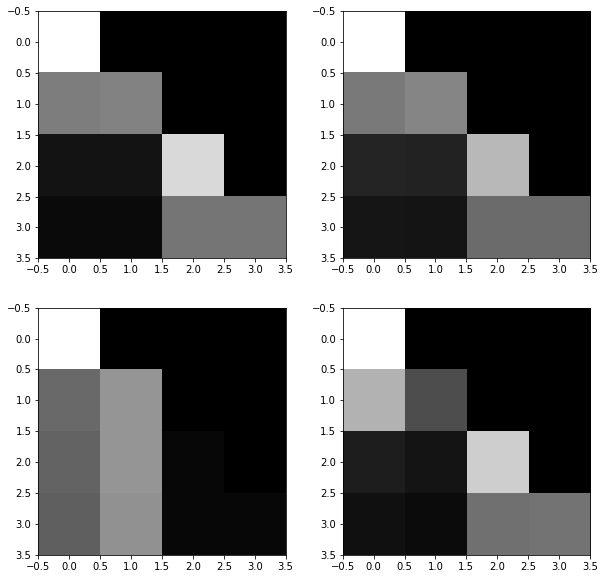

In [7]:
m = m4[:,0,...]
fig, axs = plt.subplots( 2, 2, figsize=( 10, 10 ) )

axs[0,0].imshow( m[0,0], cmap='gray', interpolation='nearest' )
axs[0,1].imshow( m[0,1], cmap='gray', interpolation='nearest' )
axs[1,0].imshow( m[1,0], cmap='gray', interpolation='nearest' )
axs[1,1].imshow( m[1,1], cmap='gray', interpolation='nearest' )